### Exploring the Iris dataset

In [16]:
import numpy as np
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets, preprocessing
from sklearn.model_selection import train_test_split

In [256]:
iris = pd.read_csv('iris.data', header=None)

In [257]:
iris.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']

In [258]:
iris.shape

(150, 5)

In [259]:
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [260]:
iris['species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: species, dtype: int64

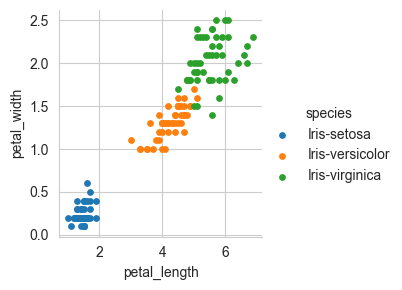

In [261]:
sns.set_style('whitegrid')
sns.FacetGrid(iris, hue = 'species').map(plt.scatter, 'petal_length', 'petal_width', s=15).add_legend()
plt.show()

In [262]:
# Converting the 'species' column in a numerical column of the iris dataframe

label_encoder = preprocessing.LabelEncoder()
iris['species'] = label_encoder.fit_transform(iris['species'])

In [263]:
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


### Implementing the own built KNN model

In [17]:
# function for finding Euclidian Distance

def euclidean_distance(x1, x2):
    distance = np.sqrt(np.sum((x1 - x2)**2))
    return distance

In [18]:
class KNN:
    def __init__(self, k = 3):    # default value of k = 3
        self.k = k
    
    def fit(self, X, y):
        self.X_train = X
        self.y_train = y
        
    def _predict(self, x):
        
        # calculating distances from all the training points
        distances = [euclidean_distance(x, x_train) for x_train in self.X_train] 
        
        # np.argsort returns the indices that would sort an array.
        k_indices = np.argsort(distances)[:self.k]
        
        # choosing indices of k nearest points
        k_nearest_labels = [self.y_train[i] for i in k_indices]
        
        # most_common returns a list of all elements and their counts
        most_common = Counter(k_nearest_labels).most_common()
        return most_common[0][0]
    
    def predict(self, X):
        predictions = [self._predict(x) for x in X]
        return predictions

In [268]:
X = iris.iloc[:, :4].values # selected the first 4 columns of all rows

In [269]:
y = iris.iloc[:, 4].values # selected the 5th column of all the rows

In [270]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state = 1234)

In [271]:
classifier = KNN(k = 4)
classifier.fit(X_train, y_train)
predictions = classifier.predict(X_test)
print(predictions)

[1, 1, 2, 0, 1, 0, 0, 0, 1, 2, 1, 0, 2, 1, 0, 1, 2, 0, 2, 1, 1, 1, 1, 1, 2, 0, 2, 1, 2, 0]


In [272]:
acc = np.sum(predictions == y_test) / len(y_test)
print(acc)

1.0


### Scikit-learn implementation of KNN algorithm

In [273]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

In [274]:
classifier_2 = KNeighborsClassifier(n_neighbors=4)

In [275]:
classifier_2.fit(X_train, y_train)
y_pred = classifier_2.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

1.0


###### Experimenting with different values of k

In [276]:
classifier_3 = KNeighborsClassifier(n_neighbors=5)
classifier_3.fit(X_train, y_train)
y_pred = classifier_3.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.9666666666666667


In [277]:
classifier_4 = KNeighborsClassifier(n_neighbors=6)
classifier_4.fit(X_train, y_train)
y_pred = classifier_4.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

1.0


In [278]:
classifier_5 = KNeighborsClassifier(n_neighbors=7)
classifier_5.fit(X_train, y_train)
y_pred = classifier_5.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.9666666666666667


In [279]:
classifier_6 = KNeighborsClassifier(n_neighbors=8)
classifier_6.fit(X_train, y_train)
y_pred = classifier_6.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

1.0


## KNN algorithm on randomly generated dataset

In [297]:
X_1 = np.random.rand(500, 4)
print(X_1.shape)

(500, 4)


In [298]:
y_1 = np.hstack([np.full(100, i) for i in range(5)])
# print(y_1.shape)
'''
hpstack: This is equivalent to concatenation in the direction of column
        but since here our array is 1-D so it is concatenating along the first axis.
             
np.full: numpy.full(shape, fill_value)
        Returns a new array of given shape and dtype(optional), filled with fill_value.

'''   

'\nhpstack: This is equivalent to concatenation in the direction of column\n        but since here our array is 1-D so it is concatenating along the first axis.\n             \nnp.full: numpy.full(shape, fill_value)\n        Returns a new array of given shape and dtype(optional), filled with fill_value.\n\n'

In [299]:
X_train, X_test, y_train, y_test = train_test_split(X_1, y_1, test_size=0.20, random_state = 1234)

#### Testing it with the sklearn model

In [300]:
classifier_7 = KNeighborsClassifier(n_neighbors=4)

In [301]:
classifier_7.fit(X_train, y_train)
y_pred = classifier_7.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.2


we can see that the accuracy is quite bad as expected

#### Testing it with own built model

In [304]:
classifier_8 = KNN(k = 4)

In [310]:
classifier_8.fit(X_train, y_train)
y_pred = classifier_8.predict(X_test)
accuracy = np.sum(y_pred == y_test) / len(y_test)
print(accuracy)

0.19


Similarly, bad accuracy here as well!
By this assessment we can conclude that the KNN algorithm performs quite bad if the data is somewhat random.

## KNN algorithm on randomly generated dataset with class probabilities

In [3]:
from sklearn.datasets import make_classification

# make_classification generates random data with the given probabilities, given no. of classes and features

In [21]:
X, y = make_classification(n_samples=500, n_features=4, n_classes=3, 
                           class_sep=2, n_informative=4, 
                           n_redundant=0, n_clusters_per_class=1, 
                           flip_y=0.01,weights=[0.4, 0.3, 0.3], random_state=1)

# here we generated a dataset with the shape (500, 4) and 3 classes with probabilities 0.4, 0.3, 0.3 respectively

#### Let's visualize this dataset

In [22]:
print(X.shape)
print(y.shape)

(500, 4)
(500,)


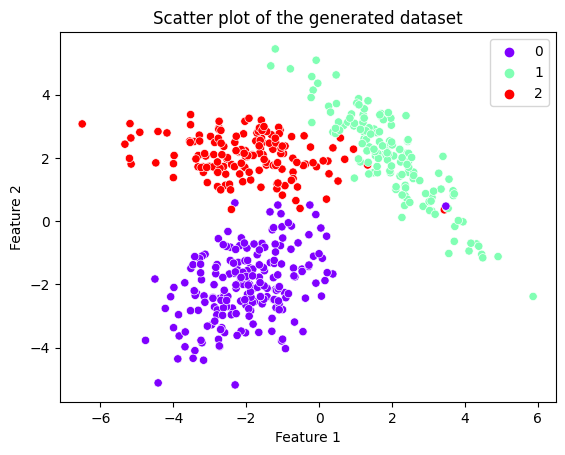

In [23]:
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y, palette="rainbow") # using the first two features

# Add a title and axis labels
plt.title("Scatter plot of the generated dataset")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")

# Show the plot
plt.show()

3-D interactive visualization

In [24]:
import plotly.graph_objs as go

data = []
colors = ['red','green','blue']
for i in range(3):
    trace = go.Scatter3d(
        x=X[y == i][:, 0],
        y=X[y == i][:, 1],
        z=X[y == i][:, 2],
        mode='markers',
        marker=dict(
            size=4,
            color=colors[i],
            opacity=0.8
        ),
        name = i
    )
    data.append(trace)

layout = go.Layout(
    title='3D Scatter plot of the dataset',
    scene=dict(
        xaxis=dict(title = 'Feature 1'),
        yaxis=dict(title = 'Feature 2'),
        zaxis=dict(title = 'Feature 3')
    )
)

fig = go.Figure(data=data, layout=layout)
fig.show()


#### Now testing the model and printing accuracy with different values of k

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state = 1)

In [30]:
classifier_9 = KNN(k = 5)
classifier_9.fit(X_train, y_train)
predictions = classifier_9.predict(X_test)
acc = np.sum(predictions == y_test) / len(y_test)
print(acc)

0.98


In [31]:
classifier_10 = KNN(k = 6)
classifier_10.fit(X_train, y_train)
predictions = classifier_10.predict(X_test)
acc = np.sum(predictions == y_test) / len(y_test)
print(acc)

0.99


In [32]:
classifier_11 = KNN(k = 20)
classifier_11.fit(X_train, y_train)
predictions = classifier_11.predict(X_test)
acc = np.sum(predictions == y_test) / len(y_test)
print(acc)

0.99


Now the accuracy is quite good when the data was generated with the given probabilities. This shows that the KNN algorithm performs very good on datasets with a clear pattern and where the decision boundary is smooth.
And it doesn't perform well when the data is highly imbalanced.